In [165]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import tweepy
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [166]:

def getClient():

    client = tweepy.Client(bearer_token = 'AAAAAAAAAAAAAAAAAAAAABqbcwEAAAAA4Vhno33E6s0OULq2Ck6j6QX3RBE%3D43GL7g7fNHFUBC5cWJOUmf0hziv133Vateg8P29csDkGZwI4tk',
                           consumer_key = 'jC6LZmiuABqFhRacKr81An1K1',
                           consumer_secret = 'HQTVbLtBdTtU1ONWVSRvNZZQIz7ai52hLLKVRqE5b3MG5uR4EZ',
                           access_token = '1489150989626183682-TzW3AA1l7YpnRpdtrDmQkS3NkQErkV',
                           access_token_secret = '2QkFh4c9sAUiT1ZnHuFtqvGAbZzjLdWJtCVomzyqWCrGk')
    return client

def searchTweets(query):

    client=getClient()

    start_time = '2022-01-01T00:00:00Z'
    end_time =   '2022-05-22T23:59:59Z'

    id = 1162694149956603904

    tweets=client.get_users_mentions(
            id = id, 
            start_time = start_time, 
            end_time = end_time,
            expansions = "author_id",
            tweet_fields = ["context_annotations", "created_at", "author_id", "public_metrics"]
            )

    return tweets

tweets=searchTweets(1162694149956603904)

if len(tweets)>0:
    for x in tweets:
        print(x)
else:
    print('No matching tweets found')

[<Tweet id=1526946552492789760 text='Esta es la historia de Isis🤗 que decidió hacer un cambio en su vida profesional haciendo el #bootcamp de #uxui. Ahora, compagina su trabajo con el de Teacher Assistant en @TheBridge_Tech. El camino es duro pero seguro dará sus frutos👩\u200d💻¡Gracias Isis por compartir tu experiencia! https://t.co/1UHKZW0UxN'>, <Tweet id=1526886949839065088 text='Gracias @victorianoI y equipo por el análisis con @graphext de los datos en educación y tecnología que vimos ayer en la primera charla de #letstalkabouteducation en @TheBridge_Tech y que pudimos debatir con @ikerarceseco Sin duda aprendimos mucho ¡Volved cuando queráis! 🧵Hilo 📊 https://t.co/wZSVGve1sn https://t.co/bLxwCvBQN5'>, <Tweet id=1526842834741039105 text='¿Cómo combatir el paro juvenil🥵? #tipdeldia En un país con una tasa de paro récord, hay que elegir bien dónde y qué estudiar.\n\nSi os queréis especializar en el sector digital, os animamos a hacerlo con @TheBridge_Tech, que cuenta con un 92% de emp

In [167]:
client=getClient()
start_time = '2022-01-01T00:00:00Z'
end_time = '2022-05-22T23:59:59Z'
id = 1162694149956603904

name_autor = []
username = []
user_id = []
tweet_text = []
tweet_id = []
author_id = []
created_at = []
retweet_count = []
reply_count = []
like_count = []
quote_count = []



for tweet in tweepy.Paginator(
        client.get_users_mentions, 
        id = id, 
        start_time = start_time, 
        end_time = end_time,
        expansions = 'entities.mentions.username',
        tweet_fields = ['context_annotations','created_at','author_id', 'public_metrics'], 
        max_results=100).flatten(limit=1000
        ):
        

        username.append((client.get_user (id = tweet.author_id))[0]['name'])
        name_autor.append((client.get_user (id = tweet.author_id))[0]['username'])
        user_id.append(tweet.entities['mentions'][0]['id'])
        tweet_text.append(tweet.text)
        tweet_id.append(tweet.id)
        author_id.append(tweet.author_id)
        created_at.append(tweet.created_at)
        retweet_count.append(tweet.public_metrics.get('retweet_count'))
        reply_count.append(tweet.public_metrics.get('reply_count'))
        like_count.append(tweet.public_metrics.get('like_count'))
        quote_count.append(tweet.public_metrics.get('quote_count'))
        # print(tweet.data)




In [168]:
tweets_thebridge = pd.DataFrame({
    'name_autor': name_autor,
    'username': username,
    'user_id': user_id,
    'tweet_text': tweet_text,
    'tweet_id': tweet_id,
    'author_id': author_id,
    'created_at': created_at,
    'retweet_count': retweet_count,
    'reply_count': reply_count,
    'like_count': like_count,
    'quote_count': quote_count
})

In [169]:
tweets_thebridge

,name_autor,username,user_id,tweet_text,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count
0,TheBridge_Tech,The Bridge,1162694149956603904,Esta es la historia de Isis🤗 que decidió hacer...,1526946552492789760,1162694149956603904,2022-05-18 15:23:22+00:00,0,0,0,0
1,TheBridge_Tech,The Bridge,10977452,Gracias @victorianoI y equipo por el análisis ...,1526886949839065088,1162694149956603904,2022-05-18 11:26:31+00:00,0,0,0,0
2,Bcasapp,Bcas,1162694149956603904,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,1526842834741039105,1336771626306854912,2022-05-18 08:31:13+00:00,4,1,8,0
3,PdelaPublicidad,Periódico PublicidAD,1162694149956603904,Los perfiles tecnológicos más demandados en el...,1526479745185198080,114739070,2022-05-17 08:28:26+00:00,2,0,1,0
4,arey,Amalio A. Rey,1162694149956603904,La 2da presentación-coloquio del #LibroIC en #...,1526133158743359488,15993641,2022-05-16 09:31:13+00:00,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
93,TheBridge_Tech,The Bridge,1162694149956603904,Del periodismo al marketing digital 🤸 esta es ...,1483469787078533123,1162694149956603904,2022-01-18 16:02:13+00:00,0,0,0,0
94,nodosenlared,Mario Lopez de Avila,723444056336953346,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,41545659,2022-01-12 19:03:03+00:00,1,0,6,0
95,ing_titiritero,Ingeniero Titiritero,1162694149956603904,Me encantaría saber que les enseñan sobre esta...,1480228635294449667,183583012,2022-01-09 17:23:02+00:00,0,0,0,0
96,cmarchena,Carlos A. Marchena,46700222,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,10045342,2022-01-08 12:10:46+00:00,0,0,4,0


In [170]:
tweets_thebridge.to_csv("tweets_thebridge.csv")

## EDA

In [171]:
tweets = pd.read_csv('tweets_thebridge.csv', sep = ',')
tweets

,Unnamed: 0,name_autor,username,user_id,tweet_text,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count
0,0,TheBridge_Tech,The Bridge,1162694149956603904,Esta es la historia de Isis🤗 que decidió hacer...,1526946552492789760,1162694149956603904,2022-05-18 15:23:22+00:00,0,0,0,0
1,1,TheBridge_Tech,The Bridge,10977452,Gracias @victorianoI y equipo por el análisis ...,1526886949839065088,1162694149956603904,2022-05-18 11:26:31+00:00,0,0,0,0
2,2,Bcasapp,Bcas,1162694149956603904,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,1526842834741039105,1336771626306854912,2022-05-18 08:31:13+00:00,4,1,8,0
3,3,PdelaPublicidad,Periódico PublicidAD,1162694149956603904,Los perfiles tecnológicos más demandados en el...,1526479745185198080,114739070,2022-05-17 08:28:26+00:00,2,0,1,0
4,4,arey,Amalio A. Rey,1162694149956603904,La 2da presentación-coloquio del #LibroIC en #...,1526133158743359488,15993641,2022-05-16 09:31:13+00:00,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,TheBridge_Tech,The Bridge,1162694149956603904,Del periodismo al marketing digital 🤸 esta es ...,1483469787078533123,1162694149956603904,2022-01-18 16:02:13+00:00,0,0,0,0
94,94,nodosenlared,Mario Lopez de Avila,723444056336953346,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,41545659,2022-01-12 19:03:03+00:00,1,0,6,0
95,95,ing_titiritero,Ingeniero Titiritero,1162694149956603904,Me encantaría saber que les enseñan sobre esta...,1480228635294449667,183583012,2022-01-09 17:23:02+00:00,0,0,0,0
96,96,cmarchena,Carlos A. Marchena,46700222,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,10045342,2022-01-08 12:10:46+00:00,0,0,4,0


In [172]:
tweets.like_count.unique()

array([ 0,  8,  1,  4,  2, 15,  6,  5,  7,  3, 12, 13], dtype=int64)

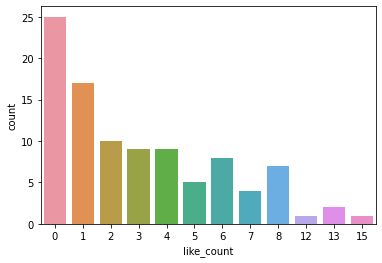

In [173]:
sns.countplot(x = 'like_count', data = tweets);

In [174]:
tweets[['like_count']].max()

like_count    15
dtype: int64

In [175]:
tweets[tweets['like_count'] == tweets['like_count'].max()]

,Unnamed: 0,name_autor,username,user_id,tweet_text,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count
10,10,JM_Torralba_,Jose Maria Torralba,1162694149956603904,En breve empezamos la charla sobre RV y Psicol...,1519706866703638529,3294953441,2022-04-28 15:55:26+00:00,1,0,15,0


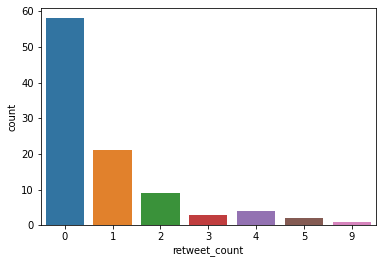

In [176]:
sns.countplot(x = 'retweet_count', data = tweets);

In [177]:
tweets[['retweet_count']].max()

retweet_count    9
dtype: int64

In [178]:
tweets[tweets['retweet_count'] == tweets['retweet_count'].max()]

,Unnamed: 0,name_autor,username,user_id,tweet_text,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count
73,73,EduvigisOrtiz,Eduvigis Ortiz,1162694149956603904,Muy #agradecida del gran #trabajo en #equipo p...,1493902011242274825,2819387949,2022-02-16 10:56:09+00:00,9,1,13,0


### Éste ha sido el tweet que más interacciones ha tenido.

In [179]:
tweets[['created_at']]

,created_at
0,2022-05-18 15:23:22+00:00
1,2022-05-18 11:26:31+00:00
2,2022-05-18 08:31:13+00:00
3,2022-05-17 08:28:26+00:00
4,2022-05-16 09:31:13+00:00
...,...
93,2022-01-18 16:02:13+00:00
94,2022-01-12 19:03:03+00:00
95,2022-01-09 17:23:02+00:00
96,2022-01-08 12:10:46+00:00


In [180]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['mes'] = pd.DatetimeIndex(tweets['created_at']).month

In [181]:
tweets.groupby(['mes']).created_at.nunique().sort_values(ascending=False)

mes
4    41
2    17
3    16
1    15
5     9
Name: created_at, dtype: int64

### En el mes de Abril es cuando han habido más menciones.

## MODELO

In [182]:
import pickle

In [183]:
with open('finished_model.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)

In [184]:
pipeline_importada

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [185]:
predictions = pipeline_importada.predict(tweets['tweet_text'])
tweets['Sentimiento'] = pd.Series(predictions)
tweets

,Unnamed: 0,name_autor,username,user_id,tweet_text,tweet_id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,mes,Sentimiento
0,0,TheBridge_Tech,The Bridge,1162694149956603904,Esta es la historia de Isis🤗 que decidió hacer...,1526946552492789760,1162694149956603904,2022-05-18 15:23:22+00:00,0,0,0,0,5,1
1,1,TheBridge_Tech,The Bridge,10977452,Gracias @victorianoI y equipo por el análisis ...,1526886949839065088,1162694149956603904,2022-05-18 11:26:31+00:00,0,0,0,0,5,1
2,2,Bcasapp,Bcas,1162694149956603904,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,1526842834741039105,1336771626306854912,2022-05-18 08:31:13+00:00,4,1,8,0,5,0
3,3,PdelaPublicidad,Periódico PublicidAD,1162694149956603904,Los perfiles tecnológicos más demandados en el...,1526479745185198080,114739070,2022-05-17 08:28:26+00:00,2,0,1,0,5,0
4,4,arey,Amalio A. Rey,1162694149956603904,La 2da presentación-coloquio del #LibroIC en #...,1526133158743359488,15993641,2022-05-16 09:31:13+00:00,4,0,4,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,TheBridge_Tech,The Bridge,1162694149956603904,Del periodismo al marketing digital 🤸 esta es ...,1483469787078533123,1162694149956603904,2022-01-18 16:02:13+00:00,0,0,0,0,1,1
94,94,nodosenlared,Mario Lopez de Avila,723444056336953346,Ciclo de Conferencias sobre Inteligencia Artif...,1481340966866989063,41545659,2022-01-12 19:03:03+00:00,1,0,6,0,1,1
95,95,ing_titiritero,Ingeniero Titiritero,1162694149956603904,Me encantaría saber que les enseñan sobre esta...,1480228635294449667,183583012,2022-01-09 17:23:02+00:00,0,0,0,0,1,0
96,96,cmarchena,Carlos A. Marchena,46700222,"@cbusquets Hola, @TheBridge_Tech te da la opci...",1479787660910768132,10045342,2022-01-08 12:10:46+00:00,0,0,4,0,1,1


### Sentimiento positivo sería 0

## SQL


In [186]:
database_sql = """ 

CREATE DATABASE IF NOT EXISTS Prueba_Tecnica;

USE prueba_tecnica;

CREATE TABLE Tweets (
Author_id    VARCHAR(255) NOT NULL,
Message_id VARCHAR(255) NOT NULL,
Message VARCHAR(280),
Date_Time_Tweet VARCHAR(255),
Replys INTEGER(255),
Retweets INTEGER(255),
Likes    INTEGER(255),
Quotes INTEGER(255),
PRIMARY KEY(Author_id)
);

CREATE TABLE Users (
Author_id    VARCHAR(255) NOT NULL UNIQUE,
Creators_Username VARCHAR(255),
PRIMARY KEY(Author_id),
FOREIGN KEY (Author_id)
REFERENCES Tweets(Author_id)
);
"""

## AWS

In [187]:
username = "David"
password = "Pokersanjuan1"
host = "database-entrevista.cfvaqnypaebq.eu-west-3.rds.amazonaws.com"


In [188]:
import pymysql

In [189]:
db = pymysql.connect(host = host,
                     user = username,
                     password = password,
                     cursorclass = pymysql.cursors.DictCursor
)

# El objeto cursor es el que ejecutará las queries y devolverá los resultados

cursor = db.cursor()

In [190]:
db.close()